<h1>Livrable final</h1>

<h2>Définition du problème</h2>

Pour ce projet, il nous a été demandé de proposer une solution au probléme de tournées de véhicules. Dans notre contexte, une entreprise veut investir dans l optimisation de son service de livraison. Nous allons devoir definir une carte, qui  sera composée de plusieurs villes à parcourir par les livreurs. L'objectif est de parcourir la carte en passant par chaque
villes une seule fois sans possibilité d'y repasser durant la tournée. Le but étant de renvoyer le livreur à son point de
départ, et de minimiser la distance de la tournée ainsi que la durée de livraison.
<br>

<h2>Contraintes choisies</h2>

Parmis les contraintes qui nous ont été proposée, voici celle que nous avons retenu :<br>
La fenêtre de temps de livraison pour chaque objet:
<ul>
    <li>
Interdiction de livrer hors de la fenêtre
    </li>
</ul>

<h2>La structure des données</h2>

Nous devons, dans un premier temps ecrire notre graphe de façon lisible pour notre programme. Pour cela, nous allons devoir choisir une structure de données.

Dans notre cas, on a choisi l'utilisation d'une matrice d'adjacence dans un fichier.

<h4>Matrices d'adjacences</h4>


Dans cette structure, on utilise une matrice carrée $m$ de taille $n\times n$ (avec $n$ le nombre de sommets) dans laquelle une arête $a~— b$ est représentée par la valeur $1$ dans l'élément $m_{ab}$. Pour les sommets non reliés entre eux, on met la valeur $0$.

Est-elle meilleure que la liste d'adjacence ?

Elle n'est ni meilleure, ni moins bonne. Certaines opérations sont plus faciles à réaliser sur cette structure, et inversement certaines sont plus faciles à effectuer sur la liste d'adjacence.

Notamment, la matrice est plus efficace pour accéder aux prédécesseurs d'un voisin (c'est aussi rapide qu'accéder à ses successeurs), vérifier l'existence d'une arête, et modifier le graphe.
    
En revanche, construire une liste de voisins d'un sommet est plus lourd, puisqu'il faut parcourir toute la ligne concernée de la matrice, ce qui implique donc un traitement en $n$ opérations ($n$ étant le nombre de sommets).

Il y a un autre point très important pour le calcul scientifique qui est la place en mémoire. Lorsqu'on considère des sommets qui se comptent en millions voire en milliards (ce qui est le cas du _social graph_ de Facebook, par exemple), c'est primordial. De ce point de vue, quelle est la structure la plus efficace ? 

On est tenté de répondre que c'est la liste d'adjacence, puisque la matrice occupe en mémoire une place proportionnelle au carré du nombre de sommets au carré, là où la liste occupe une place proportionnelle au nombre d'arêtes. Mais en fait, ces deux valeurs se rapprochent l'une de l'autre lorsque le graphe est très dense. Puisque la plupart des opérations sur les graphes sont rapides sur une matrice d'adjacence (à l'exception de la construction d'une liste de voisins, mais cela reste acceptable), on a tendance à utiliser la liste d'adjacence pour les grands graphes peu denses, et la matrice d'adjacence pour les autres.

<h4>Les algorithmes de colonies de fourmis</h4>


Les algorithmes de colonies de fourmis sont des algorithmes inspirés du comportement des fourmis, ou d'autres espèces formant un superorganisme, et qui constituent une famille de métaheuristiques d'optimisation.

Un modèle expliquant ce comportement est le suivant :

1. une fourmi (appelée « éclaireuse ») parcourt plus ou moins au hasard l’environnement autour de la colonie ;
2. si celle-ci découvre une source de nourriture, elle rentre plus ou moins directement au nid, en laissant sur son chemin une piste de phéromones ;
3. ces phéromones étant attractives, les fourmis passant à proximité vont avoir tendance à suivre, de façon plus ou moins directe, cette piste ;
4. en revenant au nid, ces mêmes fourmis vont renforcer la piste ;
5. si deux pistes sont possibles pour atteindre la même source de nourriture, celle étant la plus courte sera, dans le même temps, parcourue par plus de fourmis que la longue piste ;
6. la piste courte sera donc de plus en plus renforcée, et donc de plus en plus attractive ;
7. la longue piste, elle, finira par disparaître, les phéromones étant volatiles ;
8. à terme, l’ensemble des fourmis a donc déterminé et « choisi » la piste la plus courte.

<h4>Métaheuristique</h4>

Une métaheuristique est un algorithme d’optimisation visant à résoudre des problèmes d’optimisation difficile (souvent issus des domaines de la recherche opérationnelle, de l'ingénierie ou de l'intelligence artificielle) pour lesquels on ne connaît pas de méthode classique plus efficace.

D’une manière générale, les métaheuristiques s’articulent autour de plusieurs notions :

Voisinage ;
Diversification/exploration ;
Intensification/exploitation ;
Mémoire et apprentissage.

Pour notre cas nous avont utiliser le voisinage :

Le voisinage d'une solution est un sous-ensemble de solutions qu'il est possible d'atteindre par une série de transformations données. Par extension on désigne parfois par le terme « voisinage » l'ensemble des transformations considérées.

Un voisinage simple pour le problème du voyageur de commerce sera, par exemple, l'ensemble des solutions qu'il est possible de construire en permutant deux villes dans une solution donnée.

La notion de voisinage est sans doute le principe général le plus utilisé pour la conception d’heuristiques. Pour les problèmes combinatoires, le voisinage a un impact important sur le comportement des métaheuristiques, alors que pour des problèmes continus, la notion même de voisinage est plus difficile à cerner.

Bien qu’il n’existe que très peu de résultats théoriques sur l’adéquation entre un voisinage et un problème discret donné, il peut être possible d’en calculer des indicateurs empiriques, comme la rugosité. Les techniques les plus classiques concernant la définition d’un voisinage tournent autour des notions de permutations, de chaînes d’éjections et d’optimisations partielles.

<h1>L'algorithme de colonies de fourmis sur une grosse instance</h1>

<br>

<h2>Etape n°1: Initialiser l'instance</h2>
<br>
L'instance de cette partie de l'implémentation de l'algorithme est de taille réduite. Par instance il est sous-entendu qu'on parle d'un graphe complet connexe représenté par une matrice carrée dont chaque entrée symbolise nos villes et les valeurs le temps de parcours d'une route.


In [ ]:
import numpy as np
from numpy import inf
import random as rd
import warnings
import csv
import sys
import ast
import os
import re

#matrixes: distance and delivery schedule
def readFile(name):
    res = np.loadtxt(name, ndmin=2, dtype=np.int32)
    return res

basegraph = readFile("./graph_basegen")
file = open("./my_deliveries", "r")
contents = file.read()
deliveries = ast.literal_eval(contents)
file.close()
graphesSize = len(basegraph)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#returns arr with all the possible path lengths
def lengthCal(antPath,graph):
    length =[]
    dis = 0
    for i in range(len(antPath)):
        for j in range(len(antPath[i]) - 1):
            dis += graph[antPath[i][j]][antPath[i][j + 1]]
        dis += graph[antPath[i][-1]][antPath[i][0]]
        length.append(dis)
        dis = 0
    return length

: 

<h2>Etape n°2: Faire varier les temps de parcours selon la plage horaire</h2>
<br>
Ici, on va découper notre graphe de départ en sous graphes selon la plage horaire des villes. De ce fait on aura des tournées différentes selon les plages horaires. 

In [ ]:
#separating the graph into mini graphes for each timestamp, 8h, 10h, 12h, 14h, 16h, 18h
huit = []
dix = []
douze = []
quatorze = []
seize = []
dixhuit = []

for d in deliveries:
    if deliveries[d] == 8:
        huit.append(d)
    if deliveries[d] == 10:
        dix.append(d)
    if deliveries[d] == 12:
        douze.append(d)
    if deliveries[d] == 14:
        quatorze.append(d)
    if deliveries[d] == 16:
        seize.append(d)
    if deliveries[d] == 18:
        dixhuit.append(d)
 
graphes = []
for x in (huit,dix,douze,quatorze,seize, dixhuit):
    print("\n------------------------------------------\n", x)
    if len(x)!=0:
        sousgraph = np.zeros((len(x), len(x))).astype(int)
        for i in range(len(x)):
            for j in range(len(x)):
                sousgraph[i-1][j-1]=basegraph[x[i-1]][x[j-1]]
        graphes.append(sousgraph)
    elif not x:
        graphes.append([])


------------------------------------------
 [3, 4, 14, 17, 22, 29, 41, 42, 45, 46, 58, 63, 79, 115, 122, 128, 130, 131, 144, 151, 156, 176, 209, 212, 222, 227, 250, 255, 260, 272, 278, 294, 325, 336, 352, 362, 366, 367, 368, 372, 386, 387, 400, 420, 428, 436, 440, 450, 459, 461, 470, 513, 514, 528, 541, 555, 559, 567, 568, 571, 574, 583, 596, 601, 603, 649, 651, 677, 684, 696, 698, 726, 742, 743, 760, 770, 771, 773, 775, 776, 777, 793, 807, 809, 815, 837, 839, 851, 860, 875, 882, 886, 923, 924, 925, 947, 965, 968, 993]

------------------------------------------
 [10, 23, 33, 66, 67, 80, 91, 95, 100, 101, 107, 117, 135, 153, 164, 165, 169, 174, 180, 187, 190, 192, 197, 205, 236, 245, 251, 252, 259, 265, 269, 270, 271, 285, 299, 300, 311, 316, 335, 363, 376, 397, 402, 415, 417, 434, 469, 480, 483, 490, 503, 510, 512, 518, 544, 552, 554, 556, 566, 575, 578, 592, 623, 637, 639, 642, 644, 662, 670, 671, 679, 686, 692, 715, 716, 719, 721, 724, 729, 737, 740, 746, 749, 759, 772, 778, 792, 8

: 

: 

: 

: 

<h2>Etape n°3: Les colonies de fourmies</h2>
<br>
C'est ici que la magie opère. En effet, le but des fourmis ici est de se repérer au phéromones que leurs prédécesseuse on laissé en parcourant tout le graphe. Tout d'abord on lance une éclaireuse pour chaque plages horaires, puis après qu'elles aient parcouru leur graphe, on commence à optimiser le parcours du graphe grace à leur visibilité (appelée ici probabilité) de la prochaine arrête à emprunter et au phéromones à déposer. A savoir qu'elles n'en déposent que si la visibilité calculée est meilleures que la précédente arête. Le plus optimal sera trouvé quand la visibilité et les phéromones déposés sur la tournée ne pourront plus avoir de meilleurs résultats.

In [ ]:
import time

#ant colony for each graph
start = time.process_time()

#calculating if we can deliver all points in time according to traffic data
#open traffic file
file = open("./average_at_peek", "r")
contents = file.read()
traffic = ast.literal_eval(contents)
file.close()


shortest_path =[]
for index,graph in enumerate(graphes):
    tmp_path=[]
    if index == 0:
        reindex = huit
    elif index == 1:
        reindex = dix
    elif index == 2:
        reindex = douze
    elif index == 3:
        reindex = quatorze
    elif index == 4:
        reindex = seize
    elif index == 5:
        reindex = dixhuit
    print("Les point à livrer pour cette plage horaire sont : ", reindex)
    if len(graph)!=0 and len(graph) != 1 and len(graph)!=2:
        graphSize=len(graph)
        colonies = int(graphSize/2)
        ants = graphSize

        #pheromones init
        pheromones = np.ones((graphSize,graphSize))
        distanceproba = 1 / (np.eye(graphSize) + graph) - np.eye(graphSize)
        #colonies
        for i in range(colonies):
            antPath = np.zeros((graphSize, graphSize)).astype(int) - 1   # Ant's path
            startPoint = [i for i in range(graphSize)]
            rd.shuffle(startPoint)
            unvisited = []
            probability = []
            probAccum = 0
            for i in range(len(antPath)):
                antPath[i][0] = startPoint[i]
            for i in range(len(antPath[0])-1):
                for j in range(len(antPath)):
                    for p in range(graphSize):
                        if p not in antPath[j]:
                            unvisited.append(p)
                    for point in unvisited:
                        probAccum += pheromones[antPath[j][i]][point] ** 1 * distanceproba[antPath[j][i]][point] **1
                    for n in unvisited:
                        p =(pheromones[antPath[j][i]][n] ** 1 * distanceproba[antPath[j][i]][n] ** 1 / probAccum) if probAccum != 0 else 0
                        probability.append(p)
                    #russian roulette is not the same without a gun
                    roulette = np.array(probability).cumsum()
                    r = rd.uniform(min(roulette), max(roulette))
                    #roulette wheeeeeeee(l)
                    for x in range(len(roulette)):
                        if roulette[x] >= r:
                            antPath[j][i+1] = unvisited[x]
                            break
                    unvisited = []
                    probability = []
                    probAccum = 0         
            length = lengthCal(antPath,graph)
            for i in range(len(antPath)):
                for j in range(len(antPath[i]) - 1):
                    pheromones[antPath[i][j]][antPath[i][j + 1]] += 1 / length[i]
                pheromones[antPath[i][-1]][antPath[i][0]] += 1 / length[i]
        print("La distance est : ", min(length))
        print("Le chemin le plus court pour cette plage est  :")
        for i in antPath[length.index(min(length))]:
            tmp_path.append(reindex[i])
    elif len(graph)==2:
        print("Le chemin le plus court pour cette plage est  :")
        for i in range(len(graph)):
            tmp_path.append(reindex[i])
    elif graph == [[0]] and len(graph)!=0:
        print("Le chemin le plus court pour cette plage est  :")
        tmp_path.append(reindex[0])
    pp = list(set(tmp_path))
    tmp_path=pp.copy()
    print(tmp_path)
    shortest_path.append(tmp_path)
    
    print("----------------------------------------------------------------------------------------")
stop = time.process_time()
print("Le parcours le plus optimal est :")
tmp=0
kk=[]
for x in shortest_path:
    kk.append(list(set(x)))
shortest_path=kk.copy()
print(shortest_path)
for x in shortest_path:
    if x:
        tmp+=len(x)
nbDel = tmp
print("----------------------------------------------------------------------------------------")
print("Le nombre de points à livrer est :",nbDel)


Les point à livrer pour cette plage horaire sont :  [3, 4, 14, 17, 22, 29, 41, 42, 45, 46, 58, 63, 79, 115, 122, 128, 130, 131, 144, 151, 156, 176, 209, 212, 222, 227, 250, 255, 260, 272, 278, 294, 325, 336, 352, 362, 366, 367, 368, 372, 386, 387, 400, 420, 428, 436, 440, 450, 459, 461, 470, 513, 514, 528, 541, 555, 559, 567, 568, 571, 574, 583, 596, 601, 603, 649, 651, 677, 684, 696, 698, 726, 742, 743, 760, 770, 771, 773, 775, 776, 777, 793, 807, 809, 815, 837, 839, 851, 860, 875, 882, 886, 923, 924, 925, 947, 965, 968, 993]
La distance est :  19876
Le chemin le plus court pour cette plage est  :
[513, 514, 3, 4, 14, 528, 17, 22, 29, 541, 41, 42, 555, 45, 46, 559, 567, 568, 58, 571, 574, 63, 583, 79, 596, 601, 603, 115, 122, 128, 130, 131, 649, 651, 144, 151, 156, 677, 684, 176, 696, 698, 209, 212, 726, 222, 227, 742, 743, 760, 250, 255, 770, 771, 260, 773, 775, 776, 777, 272, 278, 793, 294, 807, 809, 815, 325, 837, 839, 336, 851, 860, 352, 362, 875, 366, 367, 368, 882, 372, 886, 386

: 

: 

: 

: 

<h2>Etape n°4: La pause</h2>
<br>
Les méta-heuristque se comportent comme des algorithmes de recherche, tentant d’apprendre les caractéristiques d’un problème afin d’en trouver une approximation de la meilleure solution. Mais si on est limité par le temps, l'algorithme doit être capable de renvoyer la meilleure solution qu'il a trouvé : celle qui tend le plus vers un optimum global.<br>
Si on pause la cellule du dessus, l'algorithme arrête d'itérer. Après ça, il nous renvoit le meilleur chemin qu'il ait pu trouver durant sont temps de calcul en respectant les contraintes imposées.

In [ ]:

#identify empty delivery times
separation = 0
for index, x in enumerate((huit,dix,douze,quatorze,seize, dixhuit)):
    if x:
        if index < 3:
            separation+=1

#for each delivery time, check if the route isnt more than 2 hours 
final_path=[0]
deliveries_left = []
for index, path in enumerate(shortest_path):
    time=0
    if(len(graph)!=0):
        for i,point in enumerate(path):
            if (time > 7200.0):
                deliveries_left.append(point)
            elif time<7200.0:
                if i < len(path)-1:
                    dist= basegraph[path[i]][path[i+1]]
                    if index <= separation:
                        time+=dist*traffic[0]['speed']/3.6
                    elif index > separation:
                        time+=dist*traffic[1]['speed']/3.6
                    final_path.append(point)

                
print("Le chemin final en respectant les plages horaires en fonction du traffic est : ")
print(final_path)
print("----------------------------------------------------------------------------------------")
print("les points qui n'ont pas pu etre livrés sont : ", deliveries_left)


Le chemin final en respectant les plages horaires en focntion du traffic est : 
[0, 513, 514, 3, 4, 14, 512, 518, 10, 23, 544]
----------------------------------------------------------------------------------------
les points qui n'ont pas pu etre livrés sont :  [528, 17, 22, 29, 541, 41, 42, 555, 45, 46, 559, 567, 568, 58, 571, 574, 63, 583, 79, 596, 601, 603, 115, 122, 128, 130, 131, 649, 651, 144, 151, 156, 677, 684, 176, 696, 698, 209, 212, 726, 222, 227, 742, 743, 760, 250, 255, 770, 771, 260, 773, 775, 776, 777, 272, 278, 793, 294, 807, 809, 815, 325, 837, 839, 336, 851, 860, 352, 362, 875, 366, 367, 368, 882, 372, 886, 386, 387, 400, 923, 924, 925, 420, 428, 947, 436, 440, 450, 965, 968, 459, 461, 470, 993, 33, 552, 554, 556, 566, 575, 66, 67, 578, 80, 592, 91, 95, 100, 101, 107, 623, 117, 637, 639, 642, 644, 135, 662, 153, 670, 671, 164, 165, 679, 169, 686, 174, 180, 692, 187, 190, 192, 197, 715, 716, 205, 719, 721, 724, 729, 737, 740, 746, 236, 749, 245, 759, 251, 252, 259, 7

: 

: 

: 

: 

<h1>Le plan d'expérience</h1>
<br>
Le plan d'expérience s'appuie sur une étude du comportement de l'algorithme utilisé dans le but de déterminer dans quels cas il est judicieux de l'utiliser. Il nous permet d'apporter une réponse à la question : L'algorithme est-il capable de nous donner une solution se rapprochant de l'optimal global pour ce cas de figure en un temps donné ?<br>
Cette partie s'appuie sur une version de notre algorithme de colonies de fourmis spécialisé sur les instances de taille réduite dans le but d'avoir des résultats pertinents pour qu'on puisse en tirer des conclusion le plus rapidement que possible.<br>

Ci-dessous, nous crééons une matrice de la taille souhaitée par l'utilisateur avec des valeurs aléatoires représentant les poids des arêtes du graphe.

In [7]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

villes = int(input('Entrez le nombre de villes :'))
nb_iter = int(input('Entrez le nombre d\'itération(s) :'))
graphe = np.random.randint(1,121, size=(villes, villes)) #génère une matrice aléatoire

Cela facilite les test en plus de les rendre plus rapides. Ensuite on crée la matrice des plages horaires correspondante car c'est une contrainte imposée dans le projet en plus de la contrainte qu'on a choisi la de la phase de modélisation du problème.<br>
La solution initiale est une tournée des meilleurs voisins à partir d'un point aléatoire pour qu'à partir de ce premier trajet des phéromones y soit laissée pour permettre aux autres fourmis de se repérer. 

In [9]:
plages = np.copy(graphe)

villes_visitées = []
meilleurs_voisins = []
randomRow = np.random.randint(len(graphe), size=1) #ville de départ
random = rd.choice(graphe[randomRow[0], :]) #valeur du point de départ
meilleure_ville = 0
indice_depart = np.array(graphe)
indice1, indice2 = np.where(indice_depart==random) #indice du point de départ dans la matrice
liste = graphe.tolist() 
l = sum(liste, []) #liste pour boucler et revenir au point de départ

print("position de départ : ", indice1[0], indice2[0])
                                                
for i in range(len(plages)): #on remplit la matrice des plages horaires
    for j in range(len(plages[i])):
        plages[i][j] = rd.randrange(0,22,2)

for i, j in enumerate(liste):
    for v, k in enumerate(liste):
        try:
            if len(meilleurs_voisins) != villes:
                if liste[i][v] < liste[i][v+1]:
                    meilleure_ville = liste[i][v]
                    villes_visitées.append(meilleure_ville)
                    meilleurs_voisins.append(meilleure_ville)
                elif liste[i][v] > liste[i][v+1] and graphe[v] in meilleurs_voisins:
                     villes_visitées.append(meilleure_ville)
        except:
            pass
        poids_total = sum(meilleurs_voisins)
indice_l = l.index( random )
print ("\nLa ville de départ est la", indice1[0], "ème ville à la ", indice_l, "ème route")

rotatedListe = meilleurs_voisins[ indice_l: ] + meilleurs_voisins[ :indice_l ]

print('\n')
print("La matrice d'adjacence: \n", graphe, "\n\n Les plages horaires associées: \n", plages, 
       "\n\n L'ordre des routes empruntées par l'éclaireuse", rotatedListe,
      "\n\n", poids_total, " min au total")


pheromones = np.array(l)
shape = (villes, villes)
ph_graphe = pheromones.reshape(shape)

phero_deposees = []
visite_fourmis = [i for i in rotatedListe]
meilleur_chemin = []

rd.seed(2)
alpha = rd.random()
const_Q = rd.random()
ph_eclaireuse = const_Q/sum(rotatedListe)
max_phero = 0

for i in range(len(ph_graphe)):
    for j in range(len(ph_graphe[i])):
        for k in range(len(rotatedListe)):
            if ph_graphe[i][j] == rotatedListe[k]:
                ph_graphe[i][j] = ph_eclaireuse

#deplacement = (ph_col**2 * 1/ph_graphe[i, j]**2) / (sum(phero_deposees)**2 * 1/sum(ph_graphe))

for iter in range(0, nb_iter):
        for i in range(len(ph_graphe)):
            for j in range(len(ph_graphe[i])):
                if ph_graphe[i, j] not in visite_fourmis:
                    visite_fourmis.append(ph_graphe[i, j])
                    ph_col = const_Q/sum(visite_fourmis)
                    phero_deposees.append(ph_col)
                    ph_graphe[i, j] = ph_col
                else: 
                    visite_fourmis.append(ph_graphe[i, j])
                try:
                    if ph_graphe[i, j] > ph_graphe[i][j+1]:
                        meilleur_chemin.append(ph_graphe[i, j])
                except:
                    pass
ph_formule_somme = (1 - alpha) * ph_col + sum(phero_deposees)
print("\n\n Tableau des phéromones déposée : ", phero_deposees, 
      "\n\n Les arrêtes empruntées : ", visite_fourmis,
      "\n\n Somme des phéromones non évaporées", ph_formule_somme)

position de départ :  7 8

La ville de départ est la 7 ème ville à la  78 ème route


La matrice d'adjacence: 
 [[ 82 108 112 100  92  81  13  25  45  37]
 [ 49 118  69  26  17  28  99  69   7  38]
 [117 107   4  27  13  77  90  52   6  69]
 [ 81  62 119 108 115 118  45 111  14  25]
 [ 31  18  68 110   8  52  35  57  51 118]
 [ 19  51 109  95   3  78  55  11  34 103]
 [ 82  96  77  48  43  10  87  65  77  49]
 [ 28  60  85  84  12  45  26  85  67  33]
 [ 67  40  44  79 103 100  71  44  74  11]
 [  3  52  47 115  50   1 116  12  22  10]] 

 Les plages horaires associées: 
 [[ 2  2 10  4 20  8  8 18  6 18]
 [ 0 18 20  4 12 20 12 16 10 16]
 [14 16  8  0  0 10 14 10 12 12]
 [16  4 16  4  6  6  0  4 10  4]
 [ 4 16 16 10 16 20 16  4 14 12]
 [16 10 18 10 10 14  4 12 14 20]
 [16  6 14  8 14 16 16 10 20 14]
 [14 10 18 16 14 14 20  6 10  4]
 [18  8 14  8  8 16 16 16 16 20]
 [18 18 12  8  6 14 16 10 20 18]] 

 L'ordre des routes empruntées par l'éclaireuse [82, 108, 13, 25, 49, 17, 28, 7, 4, 13] 

Notre objectif maintenant est de faire varier soit les instances (taille, poids etc...) de notre problème soit les paramètre aléatoire. Le paramètre le plus judicieux pour changer le comportement de l'algorithme pour espérer avoir une solution la plus optimale que possible est la quantité de phéromone déposée lors trajet. Lors de phases de test sur les phéromones, on en a conclus que même si le paramètre est aléatoire il influe grandement sur la qualité des solutions généré comme le montre le graphe suivant :

Text(0, 0.5, 'Valeur des phéromones')

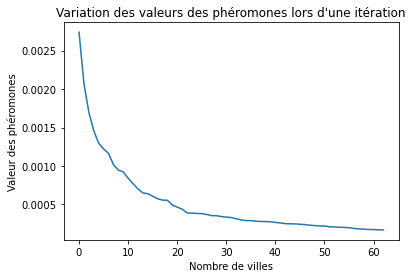

In [11]:
plt.plot(phero_deposees)
plt.title('Variation des valeurs des phéromones lors d\'une itération')  # titre
plt.xlabel('Nombre de villes')         # abscisse
plt.ylabel('Valeur des phéromones')         # ordonnée

Comme nous pouvons le constater, les fourmis qui viennent de passer laissent plus de phéromones. En revanche, plus le chemin est long, moins l'intensité des phéromones sur la piste est grande. Ce qui est logique puisque nous prenont en compte l'évaporation des phéromones laissées sur la piste.
Mais que se passe-t-il au niveau du graphe ? Le parcours a-t-il été optimisé de façon à minimiser la distance du cycle ? Le graphe ci-dessous témoigne de l'évolution du poids des arêtes empruntées selon le nombre d'itération de l'algorithme:

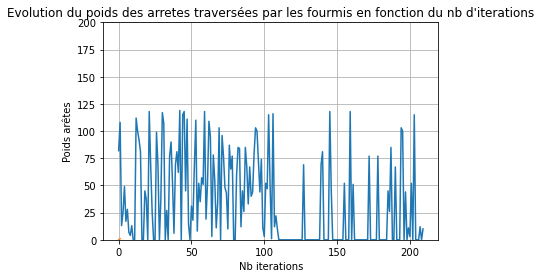

In [15]:
x = np.array([i for i in visite_fourmis])
y = np.array([i for i in plages])

t= x.tolist()
k=y.tolist()
plt.plot(visite_fourmis)
plt.plot(range(nb_iter))                    
plt.title('Evolution du poids des arretes traversées par les fourmis en fonction du nb d\'iterations') 
plt.axis([None, None, 0, 200])
plt.xlabel('Nb iterations')                      # Légende abscisse
plt.ylabel('Poids arêtes')                      # Légende ordonnée
plt.grid()                           # Ajout d'une grille
plt.show()                           

À travers ce graphe, on peut déduire que plus il y a de fourmis qui traversent le graphe, plus elles s'organisent pour ne passer que par les arrêtes avec le poids le plus minime le plus fréquement possible.

<h1>Les membres du groupe</h1>
<br>
Kevin Meffodong &nbsp &nbsp &nbsp &nbsp&nbsp &nbsp  Tayana Petro &nbsp &nbsp &nbsp &nbsp &nbsp &nbsp &nbsp&nbsp &nbsp &nbsp &nbsp  Yann Subts
<br>
<br>
<h1>Les bilans personnels</h1>
<br>
Kevin Meffodong (Chef de projet) : Durant ce ce livrable je me suis occupé de l'implémentation de notre méta-heuristique selon les instances et d'une partie du plan d'expérience.</br>
<br>
Yann Subts : Lors de ce livrable je me suis occupé de la partie modélisation. J'ai donc décris  la méthode de résolution choisie, détails sur l'algorithme utilisé, c’est-à-dire la métaheuristique choisie et la modélisation du problème selon le formalisme de cette métaheuristique (voisinage, opérations de croisement…).
</br>
<br>
Tayana Petro : Je me suis tournée essentiellement vers le problème de décision puis j’ai apporté au niveau de l'algorithme avec notamment le trajet des fourmis grâce aux phéromones. J’ai ensuite effectué une partie des études statistiques.</br>